# Jeopardy data

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

### Exploratory Data Analysis

In [2]:
df = pd.read_csv("JEOPARDY_CSV.csv")

In [3]:
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       216930 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


checking unique values in the Round column, there are four unique values Jeopardy, Final Jeopardy,
Double Jeopardy, Tiebreaker.

In [5]:
df[' Round'].unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!', 'Tiebreaker'],
      dtype=object)

Lets see the countplot for each of these Round Type, we can clearly see that majority of the samples are from Jeopardy or Double Jeopardy, and very few from Final Jeopardy and almost negligible from Tiebreaker

<AxesSubplot:xlabel=' Round', ylabel='count'>

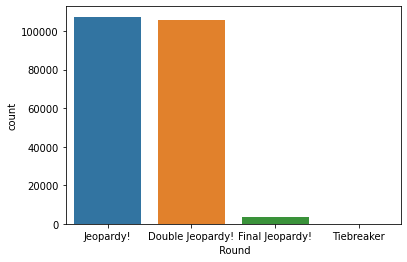

In [6]:
sns.countplot(x=' Round',data=df)

The samples from category Jeopardy are 107284

In [9]:
df[df[' Round'] == 'Jeopardy!'].count()

Show Number    107384
 Air Date      107384
 Round         107384
 Category      107384
 Value         107384
 Question      107384
 Answer        107383
dtype: int64

The samples from category Double Jeopardy are 105912

In [15]:
df[df[' Round'] == 'Double Jeopardy!'].count()

Show Number    105912
 Air Date      105912
 Round         105912
 Category      105912
 Value         105912
 Question      105912
 Answer        105911
dtype: int64

The samples from category Final Jeopardy are 3631

In [14]:
df[df[' Round'] == 'Final Jeopardy!'].count()

Show Number    3631
 Air Date      3631
 Round         3631
 Category      3631
 Value         3631
 Question      3631
 Answer        3631
dtype: int64

The samples from category Tiebreaker are only 3

In [13]:
df[df[' Round'] == 'Tiebreaker'].count()

Show Number    3
 Air Date      3
 Round         3
 Category      3
 Value         3
 Question      3
 Answer        3
dtype: int64

There are 27995 different unique categories in the 'Category' column

In [18]:
df[' Category'].nunique()

27995

checking if there are any null values

In [19]:
df.isnull().sum()

Show Number    0
 Air Date      0
 Round         0
 Category      0
 Value         0
 Question      0
 Answer        2
dtype: int64

There are no null values but some values in the 'Value' column are filled with the string 'None'.

In [6]:
df[df[' Value'] == 'None']

,Show Number,Air Date,Round,Category,Value,Question,Answer
55,4680,2004-12-31,Final Jeopardy!,THE SOLAR SYSTEM,None,Objects that pass closer to the sun than Mercu...,Icarus
116,5957,2010-07-06,Final Jeopardy!,HISTORIC WOMEN,None,She was born in Virginia around 1596 & died in...,Pocahontas
174,3751,2000-12-18,Final Jeopardy!,SPORTS LEGENDS,None,If Joe DiMaggio's hitting streak had gone one ...,H.J. Heinz (Heinz 57 Varieties)
235,3673,2000-07-19,Final Jeopardy!,THE MAP OF EUROPE,None,"Bordering Italy, Austria, Hungary & Croatia, i...",Slovenia
296,4931,2006-02-06,Final Jeopardy!,FAMOUS SHIPS,None,"On December 27, 1831 it departed Plymouth, Eng...",the HMS Beagle
...,...,...,...,...,...,...,...
216686,3940,2001-10-19,Final Jeopardy!,MAJOR LEAGUE BASEBALL TEAM NAMES,None,This team received its name after an 1890 inci...,Pittsburgh Pirates
216746,6044,2010-12-16,Final Jeopardy!,SKYSCRAPERS,None,After a construction boom fueled by oil & gas ...,Moscow
216807,5070,2006-09-29,Final Jeopardy!,NATIONAL CAPITALS,None,"This city's website calls it ""the last divided...",Nicosia
216868,5195,2007-03-23,Final Jeopardy!,BESTSELLING AUTHORS,None,He had the year's bestselling novel a record 7...,John Grisham


Dropping rows containing 'None' Values.

In [7]:
df.drop(df[df[' Value'] == 'None'].index,inplace=True)

The 'Value' column has the string of the value which also contains $ sign and columns, so removing the signs and converting the string to interger value in a new column 'ValueNum'

In [8]:
df['ValueNum'] = df[' Value'].apply(
    lambda value: int(value.replace('$', '').replace(',','')))

In [9]:
df['ValueNum'].head()

0    200
1    200
2    200
3    200
4    200
Name: ValueNum, dtype: int64

There are 145 unique values in the ValueNum column so it makes a lot of different categories to classify

In [10]:
df['ValueNum'].nunique()

145

Binning the values if the value is smaller than 1000, then we round to the nearest hundred. Otherwise, if it's between 1000 and 10k, we round it to nearest thousand. If it's greater than 10k, then we round it to the nearest 10-thousand.

In [11]:
def binning(value):
    if value < 1000:
        return np.round(value, -2)
    elif value < 10000:
        return np.round(value, -3)
    else:
        return np.round(value, -4)

df['ValueBins'] = df['ValueNum'].apply(binning)

So, Now we have 21 different values to classify instead of 145

In [12]:
df['ValueBins'].nunique()

21

Lets just take a look at the 'Question' Column.

In [40]:
df[' Question']

0         For the last 8 years of his life, Galileo was ...
1         No. 2: 1912 Olympian; football star at Carlisl...
2         The city of Yuma in this state has a record av...
3         In 1963, live on "The Art Linkletter Show", th...
4         Signer of the Dec. of Indep., framer of the Co...
                                ...                        
216924    In 2006 the cast of this long-running hit emba...
216925    This Puccini opera turns on the solution to 3 ...
216926    In North America this term is properly applied...
216927    In Penny Lane, where this "Hellraiser" grew up...
216928    From Ft. Sill, Okla. he made the plea, Arizona...
Name:  Question, Length: 213296, dtype: object

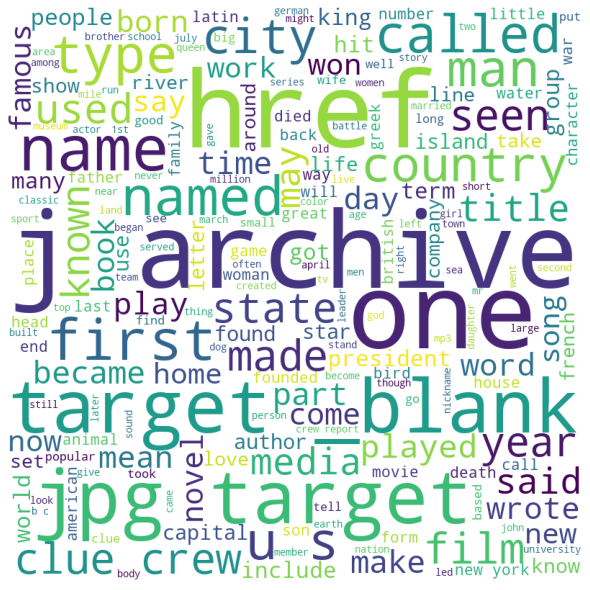

In [41]:
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df[' Question']: 
      
    val = str(val) 
    tokens = val.split() 

    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Building a Random Forest Model

Since the data is huge, but for our convenience lets take 10,000 random samples from the dataframe

In [13]:
df_sample = df.sample(n=10000)

In [ ]:
X = df_sample[' Question']
y = df_sample['ValueBins']

We will use a Random Forest Classifier model with Grid Searching for finding the best hyperparameters from our dictionary of parameters

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(max_features="sqrt")
parameters={ "max_depth":[5,8,25], 
             "min_samples_split":[1,2,5], "n_estimators":[800,1200]}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RFC, parameters)
from sklearn.model_selection import train_test_split


In [17]:
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
X = tfidf.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1)

In [30]:
clf.fit(X_train,y_train)

c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\yashb\miniconda3\li

c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\yashb\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\yashb\miniconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

GridSearchCV(estimator=RandomForestClassifier(max_features='sqrt'),
             param_grid={'max_depth': [5, 8, 25],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [800, 1200]})

In [53]:
print(clf.cv_results_['params'])

[{'max_depth': 5, 'min_samples_split': 1, 'n_estimators': 800}, {'max_depth': 5, 'min_samples_split': 1, 'n_estimators': 1200}, {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 800}, {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 1200}, {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 800}, {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 1200}, {'max_depth': 8, 'min_samples_split': 1, 'n_estimators': 800}, {'max_depth': 8, 'min_samples_split': 1, 'n_estimators': 1200}, {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 800}, {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 1200}, {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 800}, {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 1200}, {'max_depth': 25, 'min_samples_split': 1, 'n_estimators': 800}, {'max_depth': 25, 'min_samples_split': 1, 'n_estimators': 1200}, {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 800}, {'max_depth': 25, 'min_samples_split': 2, 'n

In [54]:
print(clf.cv_results_['rank_test_score'])

[18 17  8 12  8  8 13 14  6  7  5 11 15 16  1  3  1  4]


We can see that these are the best parameters from the parameter dict

In [58]:
print(clf.cv_results_['params'][-2])

{'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 800}


So this is how we get the best parameters and we can use these parameters to train over the complete data to get the best results!